# Sentiment Lab

Within the following lab, you will practice a few regex & word2vec concepts. Follow along with the guided code.

To get started, install the following packages.

In [96]:
!pip install gensim
!pip install nltk

In [97]:
import pandas as pd

import matplotlib.pyplot as plt

# nltk download words
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Regex
import re

# Word2vec
from gensim.models import Word2Vec

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saidmf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## EDA

First, let's explore some basic components of the twitter dataset regarding its text content and sentiment. Recall that we saw this dataset in phase 1!

In [ ]:
# TODO: import your tweets dataset
...

In [ ]:
# TODO: observe the first 5 rows
...

,sentiment,id,date,NO_QUERY,user,tweet
0,0,1548276360,Fri Apr 17 20:30:47 PDT 2009,NO_QUERY,customcanvasart,@USEOFFORCEENT so sorry for your loss honey I...
1,0,1548276887,Fri Apr 17 20:30:54 PDT 2009,NO_QUERY,KuppyKakejEs,Getting hair done tomorrow.Nawt exicted at all.
2,0,1548276901,Fri Apr 17 20:30:55 PDT 2009,NO_QUERY,zoeydecay,Bored watching Law and Order. Wanting sunday t...
3,0,1548277792,Fri Apr 17 20:31:04 PDT 2009,NO_QUERY,leabella,Actually I had 503 maybe I should put my web...
4,0,1548277960,Fri Apr 17 20:31:05 PDT 2009,NO_QUERY,AnitaKoch,"@lkhalladay Colorado's a beautiful state, but ..."


<Axes: ylabel='sentiment'>

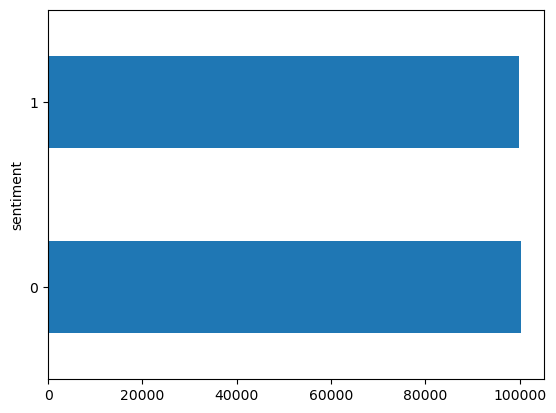

In [ ]:
# TODO: view frequency of positive `1` and negative `0` tweets as a bar chart
...

In [101]:
# TODO: Using regex, find all rows that contain the word 'hate'
tweets[tweets["tweet"].str.contains('hate')]

,sentiment,id,date,NO_QUERY,user,tweet
58,1,1548347932,Fri Apr 17 20:42:20 PDT 2009,NO_QUERY,SwaggCertified,@lootylove haha there was NO hate in that mess...
64,0,1548488103,Fri Apr 17 21:05:29 PDT 2009,NO_QUERY,reitzfamily,Going to bed and hoping my nerves will let me ...
90,0,1548524122,Fri Apr 17 21:11:34 PDT 2009,NO_QUERY,cooldude13233,"@pinkee hnn, text me (or call me :\) if you wa..."
266,0,1548744445,Fri Apr 17 21:50:36 PDT 2009,NO_QUERY,lauraelizabethm,I hate this live feed. They need a Texas C-SPAN.
323,1,1548811333,Fri Apr 17 22:02:32 PDT 2009,NO_QUERY,alina_wang,@DaniKillafornia haha...thanks!!! i hate flyi...
...,...,...,...,...,...,...
199681,1,1792419545,Wed May 13 23:04:56 PDT 2009,NO_QUERY,LayneCullen,@ddlovato My role model is back.. I miss your...
199706,0,1792427880,Wed May 13 23:06:22 PDT 2009,NO_QUERY,KillingKansas,I literally feel sick without him...I hate tha...
199796,0,1792579175,Wed May 13 23:34:04 PDT 2009,NO_QUERY,raphnix,is feeling sick today. I'm going to hate oreo ...
199850,0,1792658971,Wed May 13 23:49:19 PDT 2009,NO_QUERY,sun77,UGH! ....I hate migraines


In [ ]:
# TODO: Using regex, find all rows that contain the word 'love'
...

,sentiment,id,date,NO_QUERY,user,tweet
12,1,1548284663,Fri Apr 17 20:32:07 PDT 2009,NO_QUERY,lolamirabella,I feel well I listened to my instincts and ha...
32,0,1548308000,Fri Apr 17 20:35:52 PDT 2009,NO_QUERY,janeyjaney,...... Oh how i love being awake at stupid o'c...
44,1,1548317710,Fri Apr 17 20:37:22 PDT 2009,NO_QUERY,jessicaa323,@ludajuice i like luda's twitter status love...
55,1,1548346238,Fri Apr 17 20:42:04 PDT 2009,NO_QUERY,mnm310,"@RyanSeacrest No, i'd totally love it"
58,1,1548347932,Fri Apr 17 20:42:20 PDT 2009,NO_QUERY,SwaggCertified,@lootylove haha there was NO hate in that mess...
...,...,...,...,...,...,...
199832,1,1792616317,Wed May 13 23:41:10 PDT 2009,NO_QUERY,CicelyElizabeth,@realwizkhalifa I love your glasses (RealWiz...
199912,1,1936026795,Wed May 27 07:19:19 PDT 2009,NO_QUERY,redlantern64,I think I may be a bit too liberal with the &q...
199928,0,1936043550,Wed May 27 07:21:07 PDT 2009,NO_QUERY,wizum,Slow moving Wednesday... don't you just love t...
199947,0,1936057569,Wed May 27 07:22:39 PDT 2009,NO_QUERY,1434ever,@kristenstewart9 do u get 2 go cite cing often...


## BOW

Let's apply the bag of words technique to note similarities between tweets. Note that this entails no machine learning, but rather a simple vector operation on our pandas dataframe.

In [103]:
from collections import Counter

bagged_words = tweets["tweet"].apply(lambda x: Counter(x.lower().split(" ")))

bagged_words

0         {'@useofforceent': 1, 'so': 1, 'sorry': 1, 'fo...
1         {'getting': 1, 'hair': 1, 'done': 1, 'tomorrow...
2         {'bored': 1, 'watching': 1, 'law': 1, 'and': 1...
3         {'actually': 1, 'i': 2, 'had': 1, '503': 1, ''...
4         {'@lkhalladay': 1, 'colorado's': 1, 'a': 1, 'b...
                                ...                        
199995    {'@j2s': 1, 'michelle': 1, 'and': 1, 'i': 1, '...
199996    {'playing': 1, 'with': 1, 'the': 1, 'free': 1,...
199997    {'@archerismyname': 1, '...he's': 1, 'at': 1, ...
199998    {'@fald': 1, 'happy': 1, 'birthday': 1, '': 1,...
199999    {'@ether_radio': 1, 'awh': 1, 'no,': 1, 'i'm':...
Name: tweet, Length: 200000, dtype: object

In [104]:
# let's look at tweet 58 & 64 and check if our BOW transformation reveals any insights between these two tweets
bagged_words[58]

Counter({'haha': 2,
         '@lootylove': 1,
         'there': 1,
         'was': 1,
         'no': 1,
         'hate': 1,
         'in': 1,
         'that': 1,
         'message.': 1,
         '': 1,
         'youtube': 1,
         'series': 1,
         '=': 1,
         'big': 1,
         'things,': 1,
         'chi': 1,
         'afterdark': 1,
         'with': 1,
         'a': 1,
         'bawse!': 1})

In [105]:
bagged_words[64]

Counter({'my': 2,
         'going': 1,
         'to': 1,
         'bed': 1,
         'and': 1,
         'hoping': 1,
         'nerves': 1,
         'will': 1,
         'let': 1,
         'me': 1,
         'rest.': 1,
         'i': 1,
         'hate': 1,
         'knowing': 1,
         'backyard': 1,
         'is': 1,
         'wide': 1,
         'open': 1,
         '': 1})

## TF-IDF

Let's explore how the `tf-idf` algorithm iterates upon the simple BOW model.

In [126]:
# since this is a heavy operation, sample a small subset of tweets
sample_tweets = tweets.sample(50, random_state=42).reset_index(drop=True)

sample_tweets.head()

,sentiment,id,date,NO_QUERY,user,tweet
0,1,2068294456,Sun Jun 07 13:50:14 PDT 2009,NO_QUERY,lesleyburt,Has the next three days off. Yes!
1,1,2053520073,Sat Jun 06 04:50:46 PDT 2009,NO_QUERY,scoutwife09,is ready to see him. R&amp;R starts in a week-...
2,0,2324297584,Thu Jun 25 02:48:17 PDT 2009,NO_QUERY,verisqa,It feels like the&quot;quitter&quot; inside of...
3,0,1835133330,Mon May 18 05:13:49 PDT 2009,NO_QUERY,monkeytude,didn't make it through work. Docs app later to...
4,0,1565066429,Mon Apr 20 05:48:07 PDT 2009,NO_QUERY,ozdj,@ccollinsmith You didn't do the trip to Chicag...


In [127]:
# lowercase and remove punctuation (basic clean)
cleaned_tweets = sample_tweets["tweet"].str.lower().str.replace("[^\w\s]", "", regex=True)

cleaned_tweets

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\saidmf\AppData\Local\Temp\ipykernel_23120\1177501560.py:2: SyntaxWarning: invalid escape sequence '\w'
  cleaned_tweets = sample_tweets["tweet"].str.lower().str.replace("[^\w\s]", "", regex=True)


0                      has the next three days off yes 
1     is ready to see him rampr starts in a weekish ...
2     it feels like thequotquitterquot inside of me ...
3     didnt make it through work docs app later to t...
4     ccollinsmith you didnt do the trip to chicago ...
5     vestaeresta geez a cool man like him be the vi...
6                        oh already 57ï½fwowwarm   hmm 
7     shaun_whltravel were right there with you   vi...
8     dear twitter my life sucks because everybody s...
9     working at hltkinda boring tonight not that ma...
10    good morning beautiful tweeties how is everyon...
11      alwaysshoutalex a hugeee no to pessimism it is 
12                                    having a bad day 
13    on the train to manc alisdairs here too missed...
14    sallyinnorfolk oh nohope you get it working so...
15    comedyqueen i know hes ignoring me now hes all...
16              eating spouses buffaloed popcorn yummy 
17    so emma has a moderate size hole in her he

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# fit and transform
tfidf_matrix = vectorizer.fit_transform(cleaned_tweets)

# convert to DataFrame for display
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.head()

,20,2nite,519,530,57ï½fwowwarm,about,again,ah,alisdairs,all,...,xo,yay,yeah,year,yes,yesterday,you,youzle,yummy,zannemichaels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.4286,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.165879,0.0,0.0,0.0


In [129]:
# view top 3 TF-IDF terms per tweet
for idx, row in tfidf_df.iterrows():
    top_words = row.sort_values(ascending=False).head(3)
    print(f"\nTweet {idx+1}: \"{sample_tweets.loc[idx, 'tweet']}\"")
    print("Top TF-IDF words:")
    print(top_words)


Tweet 1: "Has the next three days off. Yes! "
Top TF-IDF words:
yes      0.4286
next     0.4286
three    0.4286
Name: 0, dtype: float64

Tweet 2: "is ready to see him. R&amp;R starts in a week-ish  Going to enjoy every minute of his leave...beach trip!!!"
Top TF-IDF words:
weekish    0.267439
every      0.267439
starts     0.267439
Name: 1, dtype: float64

Tweet 3: "It feels like the&quot;quitter&quot; inside of me is trying to show her domination "
Top TF-IDF words:
thequotquitterquot    0.332567
feels                 0.332567
domination            0.332567
Name: 2, dtype: float64

Tweet 4: "didn't make it through work. Docs app later to try and get a sick cert. couldn't handle focusing on work &amp; other thoughts in my head "
Top TF-IDF words:
work        0.392009
focusing    0.216737
sick        0.216737
Name: 3, dtype: float64

Tweet 5: "@ccollinsmith You didn't do the trip to Chicago for #symp09 ?    Robbed!  Make up for it with a trip to Sydney instead  "
Top TF-IDF words:
trip

## Word2Vec

Finally let's utilize a word2vec model to analyze the content of our tweets. 

First, we'll go through a small toy-example to show off the power of word-2-vec. Next, we'll apply it to our dataset for its predictive capabilities.

In [ ]:
# TODO: word2vec example. Notice each step that we take and the output that it makes. 
...

# view the text data you are working with
frankenstein

['\ufeffThe Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus\n',
 '    \n',
 'This ebook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n',
 'of the Project Gutenberg License included with this ebook or online\n',
 'at www.gutenberg.org. If you are not located in the United States,\n',
 'you will have to check the laws of the country where you are located\n',
 'before using this eBook.\n',
 '\n',
 'Title: Frankenstein; Or, The Modern Prometheus\n',
 '\n',
 'Author: Mary Wollstonecraft Shelley\n',
 '\n',
 'Release date: October 1, 1993 [eBook #84]\n',
 '                Most recently updated: November 5, 2024\n',
 '\n',
 'Language: English\n',
 '\n',
 'Credits: Judith Boss, Christy Phillips, Lynn Hanninen and David Meltzer. HTML version by Al Haines.\n',
 '        Further corrections by Menno de Leeuw.\n'

In [107]:
# create a word lemmatizer (get the lemma of each word)
lemma = WordNetLemmatizer()

# break data into tokens and remove stop-words
data = []
for sent in frankenstein:
  new_sent = []
  for word in sent.split():
    new_word = word.lower()
    if (new_word[0] not in string.punctuation) and (new_word[0] not in stopwords.words('english')):
      new_sent.append(lemma.lemmatize(new_word))
  if len(new_sent) > 0:
    data.append(new_sent)

for sentence in data:
  print(sentence)

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'frankenstein;', 'prometheus']
['ebook', 'for', 'use', 'united']
['part', 'world', 'no', 'cost', 'with', 'no', 'restriction']
['whatsoever.', 'copy', 'give', 're-use', 'under']
['project', 'gutenberg', 'license', 'with', 'ebook']
['www.gutenberg.org.', 'not', 'located', 'united']
['will', 'have', 'check', 'law', 'country', 'where', 'located']
['before', 'using', 'ebook.']
['frankenstein;', 'prometheus']
['wollstonecraft']
['release', '1,', '1993']
['recently', 'updated:', 'november', '5,', '2024']
['language:', 'english']
['credits:', 'judith', 'boss,', 'christy', 'phillips,', 'lynn', 'hanninen', 'html', 'version', 'by', 'haines.']
['further', 'correction', 'by', 'leeuw.']
['project', 'gutenberg', 'ebook', 'frankenstein;', 'prometheus']
['frankenstein;']
['prometheus']
['by', 'wollstonecraft']
['content']
['letter', '1']
['letter', '2']
['letter', '3']
['letter', '4']
['chapter', '1']
['chapter', '2']
['chapter', '3']
['chapter', '4']
['ch

In [108]:
# Create a word2vec model
w2v_model = Word2Vec(sentences=data)

# train the model on your dataa
w2v_model.train(data, total_examples=len(data), epochs=50)

(872451, 1647450)

In [109]:
# note that each unique word gets its own unique key pairing. Let's see what features were learned from these words!
w2v_model.wv.key_to_index

{'wa': 0,
 'with': 1,
 'had': 2,
 'but': 3,
 'he': 4,
 'which': 5,
 'his': 6,
 'for': 7,
 'not': 8,
 'by': 9,
 'from': 10,
 'have': 11,
 'be': 12,
 'her': 13,
 'when': 14,
 'were': 15,
 'will': 16,
 'could': 17,
 'been': 18,
 'would': 19,
 'we': 20,
 'no': 21,
 'who': 22,
 'him': 23,
 'now': 24,
 'before': 25,
 'upon': 26,
 'what': 27,
 'every': 28,
 'first': 29,
 'can': 30,
 'even': 31,
 'being': 32,
 'project': 33,
 'work': 34,
 'how': 35,
 'whom': 36,
 'where': 37,
 'eye': 38,
 'found': 39,
 'feeling': 40,
 'very': 41,
 'father': 42,
 'life': 43,
 'felt': 44,
 '“i': 45,
 'while': 46,
 'up': 47,
 'ha': 48,
 'never': 49,
 'night': 50,
 'few': 51,
 'ever': 52,
 'like': 53,
 'became': 54,
 'passed': 55,
 'heard': 56,
 'human': 57,
 'little': 58,
 'gutenberg™': 59,
 'word': 60,
 'friend': 61,
 'whose': 62,
 'cannot': 63,
 'until': 64,
 'hope': 65,
 'great': 66,
 'heart': 67,
 'place': 68,
 'chapter': 69,
 'hour': 70,
 'know': 71,
 'long': 72,
 'him,': 73,
 'elizabeth': 74,
 'part': 75,
 

In [110]:
# Let's the view output of one word in our word2vec model...
w2v_model.wv["frankenstein"]

# doesn't make too much sense at the moment

array([ 0.06690282,  0.21712306, -0.03683871,  0.12733595,  0.1611069 ,
       -0.15843841,  0.33516794,  0.33095518, -0.27651894, -0.11906926,
       -0.19868055, -0.14470634, -0.06890234,  0.05978322,  0.15237942,
       -0.20916086,  0.16371587, -0.03633736,  0.00158671, -0.27956575,
        0.05068918, -0.09695531,  0.07020564, -0.04228917, -0.13907133,
        0.01390934, -0.3492193 ,  0.03231388,  0.07842863,  0.10160822,
        0.539835  ,  0.04926544,  0.02862317, -0.3141291 , -0.21383752,
        0.1645672 ,  0.06119074,  0.00677506, -0.2306889 , -0.40662417,
       -0.02587144, -0.23674901, -0.01758608, -0.03214507, -0.02406515,
       -0.21483606, -0.10871917,  0.02597824,  0.33884323,  0.13947871,
        0.07681713, -0.28230694, -0.01108569, -0.0666979 , -0.1392824 ,
       -0.09410706,  0.14520767, -0.29263896, -0.10756904, -0.10386347,
       -0.09554537, -0.05779042,  0.34159887,  0.11905584, -0.16177033,
        0.43912163,  0.21569054,  0.27943856, -0.39373207,  0.13

In [111]:
# let's contextualize this! What are the most similar words to "frankenstein"
w2v_model.wv.most_similar("frankenstein")

[('condemned,', 0.9218860864639282),
 ('follow', 0.9055399298667908),
 ('children,', 0.9003420472145081),
 ('possess', 0.8955884575843811),
 ('gone', 0.8940545320510864),
 ('hired', 0.8865004181861877),
 ('committed', 0.8857221603393555),
 ('probably', 0.8814356923103333),
 ('earnestly', 0.8783954381942749),
 ('lived,', 0.8768479228019714)]

In [112]:
# now let's try something fun
# we will get the vector embedding of creation
creation = w2v_model.wv["creation"]

# as well as the vector embedding of orrible
horrible = w2v_model.wv["horrible"]

creation + horrible

array([-0.34971896,  0.4256536 ,  0.02270654,  0.16596508,  0.15893003,
       -0.7118391 ,  0.06262854,  0.59024906,  0.161489  , -0.49445915,
       -0.10157751, -0.34419262,  0.24847847,  0.07301375,  0.3508029 ,
       -0.24570592, -0.00685855, -0.5694647 , -0.1566416 , -0.9308973 ,
        0.07579654, -0.16885053,  0.50980145, -0.5602549 , -0.09674843,
        0.03265582, -0.40845627,  0.29345796, -0.09800665,  0.13540274,
        0.44286627,  0.17189088,  0.28355178, -0.02382837,  0.12443632,
        0.07394258, -0.11000907, -0.3671643 , -0.28030282, -0.34431756,
        0.07215827, -0.23445812, -0.4938336 ,  0.00952211,  0.40555444,
       -0.52561414, -0.23514053, -0.20984846,  0.5916898 ,  0.40223008,
        0.5660776 , -0.26898012,  0.00666402,  0.13295376, -0.21670757,
        0.40435296,  0.1875358 ,  0.20520431, -0.38995773,  0.08768798,
        0.21603039, -0.03165722, -0.25618395,  0.00368653, -0.25124067,
        0.19231248,  0.24504358,  0.42648795, -0.46090746,  0.12

In [113]:
# again, nothing too interesting happening yet, but let's see what are the most similar vectors to this addition
w2v_model.wv.most_similar(creation + horrible)

[('frame', 0.9365924000740051),
 ('horrible', 0.9293009042739868),
 ('painful', 0.9199003577232361),
 ('being;', 0.9154784083366394),
 ('creation', 0.8973706364631653),
 ('beings.', 0.8954265117645264),
 ('being.', 0.8855059742927551),
 ('nature,', 0.8850323557853699),
 ('judge', 0.8849316835403442),
 ('barrier', 0.8812384605407715)]

Now, let's apply this model to our 200,000 row dataset.

In [130]:
# Preprocess your tweet column

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\saidmf\AppData\Local\Temp\ipykernel_23120\2673731379.py:6: SyntaxWarning: invalid escape sequence '\S'
  TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


In [132]:
# Apply this preprocessing to the tweet column
tweets["lemma_tweet"] = tweets["tweet"].apply(lambda x: preprocess(x))

In [133]:
# get a sample of 5 random tweets
tweets["lemma_tweet"].sample(5)

159641                                 waking early morning
163702                            haha im reading f l tight
24362                                                thanks
25714     damn means gotta dish money another state east...
24156                                        soooo wanna vj
Name: lemma_tweet, dtype: object

In [134]:
# create a train,test split
X_train, X_test = train_test_split(tweets[["lemma_tweet"]], test_size=0.2, random_state=42)
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 160000
TEST size: 40000


In [137]:
# tokenize your data
sentences = [t.split() for t in X_train.lemma_tweet] 

In [138]:
sentences

[['baket', 'mo', 'ba', 'iyong', 'pinaasa'],
 ['damn', 'feels', 'empty', 'happy', 'guys', 'around', 'mroda'],
 ['ha', 'eat', 'junk', 'food', 'sometimes', 'phew', 'lol'],
 ['oh', 'virgin', 'mojito'],
 ['throat', 'hurts', 'soooooo', 'bad', 'cant', 'talk'],
 ['moodle', 'sucks', 'already', 'ba', 'education'],
 ['wonderful', 'things', 'man'],
 ['guys', 'really', 'good', 'night', 'tonight'],
 ['curses',
  'like',
  'onion',
  'garlic',
  'flavored',
  'ones',
  'want',
  'plain',
  'ol',
  'cheese'],
 ['got',
  '9',
  'bsc',
  'project',
  'done',
  'work',
  'house',
  'hoping',
  'finished',
  'tomorrow',
  'really',
  'believing',
  'though',
  'see'],
 ['going',
  'hairdresser',
  'hopes',
  'make',
  'feel',
  'better',
  'nedds',
  'last',
  'night'],
 ['hope', 'ur', 'ok', 'thinking', 'u'],
 ['shit', 'shit', 'shit', 'gotta', 'hate', 'rain', 'saturday', 'bummer'],
 ['wiggled', 'blood', 'taken', 'morning', 'lovely'],
 ['followers', 'grown', 'bit'],
 ['fingers', 'hurt'],
 ['way', 'bondi', 

In [139]:
# create a word2vec model
w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)

In [140]:
# take a look at the INITIAL vocab words that it discovered
w2v_model.wv.key_to_index

{'good': 0,
 'day': 1,
 'get': 2,
 'like': 3,
 'go': 4,
 'quot': 5,
 'today': 6,
 'love': 7,
 'going': 8,
 'work': 9,
 'got': 10,
 'lol': 11,
 'back': 12,
 'time': 13,
 'u': 14,
 'one': 15,
 'know': 16,
 'im': 17,
 'really': 18,
 'amp': 19,
 'see': 20,
 'night': 21,
 'still': 22,
 'new': 23,
 '2': 24,
 'think': 25,
 'want': 26,
 'well': 27,
 'thanks': 28,
 'home': 29,
 'oh': 30,
 'much': 31,
 'miss': 32,
 'need': 33,
 'last': 34,
 'hope': 35,
 'morning': 36,
 'tomorrow': 37,
 'twitter': 38,
 'great': 39,
 '3': 40,
 'haha': 41,
 'feel': 42,
 'sad': 43,
 'wish': 44,
 'right': 45,
 'fun': 46,
 'sleep': 47,
 'would': 48,
 'bad': 49,
 'happy': 50,
 'come': 51,
 'sorry': 52,
 'tonight': 53,
 'gonna': 54,
 'getting': 55,
 'way': 56,
 'though': 57,
 'nice': 58,
 'make': 59,
 'watching': 60,
 'better': 61,
 'yeah': 62,
 'wait': 63,
 'could': 64,
 'bed': 65,
 'week': 66,
 'people': 67,
 'hate': 68,
 'even': 69,
 'next': 70,
 'hey': 71,
 'school': 72,
 'days': 73,
 'yes': 74,
 'weekend': 75,
 'aw

In [141]:
# let's train our model
w2v_model.train(sentences, total_examples=len(sentences), epochs=20)

(19855365, 23065060)

In [142]:
# let's take a look at the vector we trained for the word 'lol'
w2v_model.wv["lol"]

array([ 0.95941985,  0.76271474,  1.0265334 , -0.07348159,  1.1607817 ,
        0.52825594,  0.6889358 ,  0.30693173, -0.7203912 , -0.38660952,
       -0.34390953, -0.03491795,  0.20567222, -1.6904042 , -0.18597087,
        0.22677846,  0.06686719, -0.1905017 , -0.06871659, -1.2238246 ,
        0.21968263, -0.2975498 , -0.3523839 ,  0.4979725 , -0.05708199,
       -0.3692399 , -0.26347393,  0.21016994, -0.1620969 , -1.646043  ,
        0.5107038 , -0.67437774, -0.5996947 , -0.09915402, -0.6610882 ,
       -1.5782448 ,  0.94970214,  0.3609074 , -0.16367576, -0.28969347,
        0.63590324,  0.22208878,  0.10729707,  0.6581444 ,  0.20675929,
       -0.24829681, -0.15839791, -0.05768076,  0.7809172 ,  0.41198808,
        0.45741844,  0.52879727,  0.08081418, -0.6340847 , -1.089232  ,
       -0.18107335, -0.6675708 , -0.65089667, -0.36040956,  0.04712114,
        0.38007745, -0.05048454,  1.0994226 ,  0.03075153,  0.75460297,
       -1.0315728 , -0.34149033,  0.6203523 ,  0.37067243, -0.19

In [143]:
# as we've established already, this does not give us too much info, let's take a look at the MOST similair words
w2v_model.wv.most_similar("lol")

# AMAZING! Our word2vec model "understands" what 'lol' means
# feel free to play around with this word to see what other words come up

[('haha', 0.7267212867736816),
 ('lmao', 0.6739226579666138),
 ('hahaha', 0.6508210897445679),
 ('lmfao', 0.5715823769569397),
 ('kno', 0.5431439280509949),
 ('def', 0.5365310311317444),
 ('jk', 0.5243579149246216),
 ('nah', 0.523402750492096),
 ('yea', 0.5016638040542603),
 ('tht', 0.49836069345474243)]

In [148]:
# just like before, let's combine two vectors via addition and see if the semantic output makes sense
morning = w2v_model.wv["morning"]
breakfast = w2v_model.wv["breakfast"]

w2v_model.wv.most_similar(morning + breakfast)

[('morning', 0.833176851272583),
 ('breakfast', 0.7745380997657776),
 ('afternoon', 0.661072850227356),
 ('mornin', 0.5386030077934265),
 ('9am', 0.534061074256897),
 ('coffee', 0.5160681009292603),
 ('donuts', 0.5142720937728882),
 ('wake', 0.49883297085762024),
 ('brunch', 0.49722740054130554),
 ('evening', 0.493387907743454)]

In [151]:
# finally, let's apply some PCA to each word in our model in order to reduce these values into a comprehensible visualization
# NOTE: we limit this to 100 words so that this doesn't take all night to run
words = list(w2v_model.wv.key_to_index.keys())[:100] 
word_vectors = [w2v_model.wv[word] for word in words]

word_vectors

[array([-0.41522554,  0.04852307,  0.39301834, -0.06442531, -2.1257143 ,
        -0.6067673 ,  1.053514  , -0.45212296, -0.04690838, -0.21429239,
         0.93892866, -0.59955126, -0.98304343, -0.69595605,  0.10032141,
        -1.3681183 ,  0.89526725,  0.66179585, -0.3599091 , -0.06805667,
         1.6930647 ,  0.69205415,  1.0123075 ,  0.33328372,  0.38170448,
        -0.946531  ,  0.38224065, -1.1762159 ,  0.34558302, -2.4531302 ,
        -2.4478154 , -0.03461583,  0.09979688, -1.5742936 ,  0.99989915,
         0.20302396,  0.57563645, -1.4877193 , -0.9051406 ,  0.01949492,
        -1.239834  ,  2.3504777 , -0.81223893, -0.11218078,  0.35025856,
         0.40622404, -0.5488888 ,  0.11190124, -0.56823707, -0.04115425,
        -1.6892868 ,  0.70646775, -0.5595695 , -0.5349516 ,  0.8256277 ,
        -1.4247075 , -1.6137108 , -1.0277714 ,  0.8179675 ,  0.6295907 ,
         1.664112  ,  0.58500385, -0.41014445, -1.1420789 ,  0.91318333,
         0.47921208, -1.2955693 , -0.20944566, -1.0

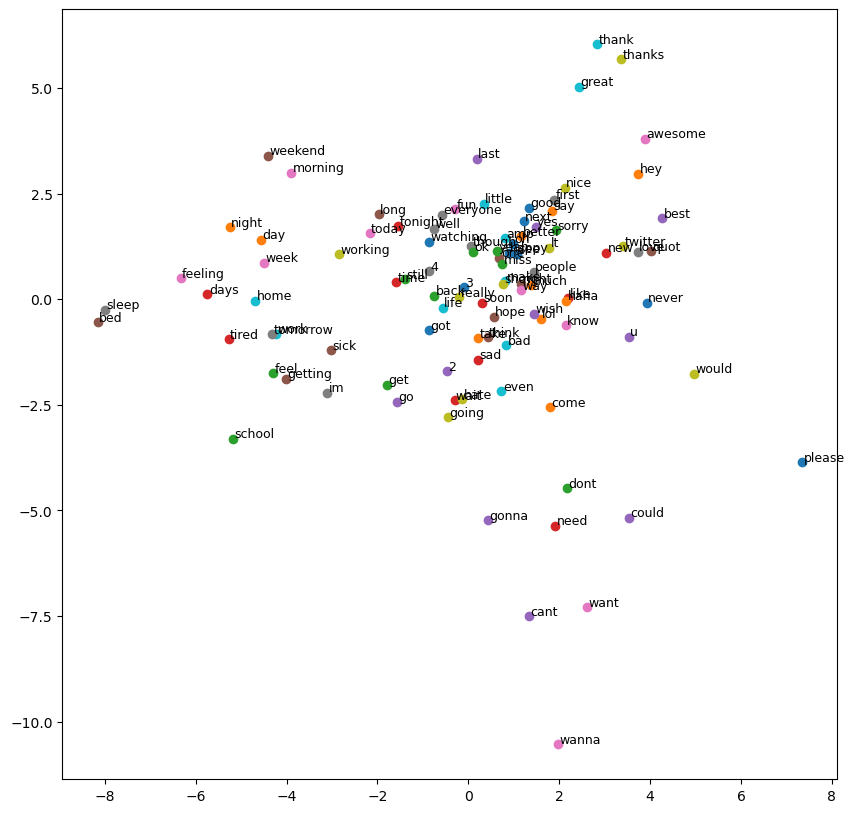

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(pca_vectors[i, 0], pca_vectors[i, 1])
    plt.text(pca_vectors[i, 0]+0.03, pca_vectors[i, 1]+0.03, word, fontsize=9)
plt.show()

Notice that the model has sufficiently captured the semantic relationships of words! For example, `sleep` and `bed` are next to one another.

We will see how we can apply this to the understanding of LLM's by tomorrow. For now, let's consider a few reflection questions.

# Self-Reflective Questions

## Q1

Which vectors (words) do you notice have high cosine similarity? Feel free to use `most_similar` to answer this?

write answer here

## Q2

Why do we apply PCA to this dataset? 

write answer here

## Q3

Now that we've reduced our vectors to two PCA components, what unsupervised learning algorithm can we apply in order to find clusters of words?

write answer here